<a href="https://colab.research.google.com/github/Nicolasalan/Object-Detection-Tensorflow/blob/main/DataSet_Mask_TensorFlow1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Selecionar GPU**

**Para iniciarmos a geração de DataSet Sintético, primeiro precisamos de poder computacional, mais precisamente uma GPU forte para processar os comandos.**

Dentro do Google Colab tem essa opção de escolher a GPU de forma  grátis. No menu principal clicar em “Tempo de execução”.
Captura de ecrã 2022-08-10, às 13.53.00.png

Em seguida clique em “alterar tipo de Tempo de execução”.

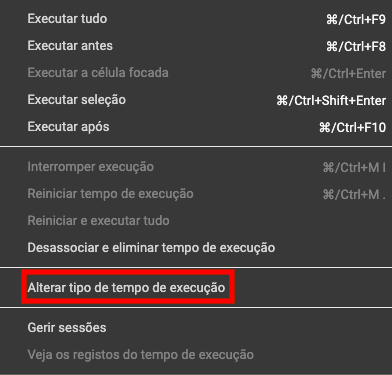

Dentro desse campo, selecionar a opção de GPU em “Acelerador de hardware” e selecionar RAM Alta em “Forma de tempo de execução”.

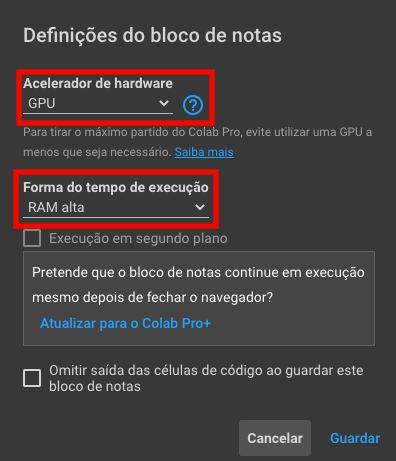

**Esse comando verifica qual GPU o Colab disponibilizou para execução.**

In [2]:
!nvidia-smi

Mon Aug 22 23:03:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Observações sobre o Google Colab:

*   Toda vez que iniciar o Colab tem que instalar tudo de novo, e configurar a GPU
*   Todos os arquivos colocados aqui são apagados assim que fecha o Colab
*   Se não tiver atividade nenhuma o Colab desconecta automaticamente depois de um tempo
*   Caso a internet acabe, possa ser que tenha que começar tudo de novo
*   Nada fica salvo no Colab, menos os scripts de comando.







# **Instalações**

**Lembrando:** Esse processo de instalação pode demorar um pouco

## Instalando Tensorflow 1.14.0

In [3]:
import os
import pathlib

# Clone o repositório de modelos do tensorflow se ele ainda não existir
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3452, done.
remote: Counting objects: 100% (3452/3452), done.
remote: Compressing objects: 100% (2891/2891), done.
remote: Total 3452 (delta 892), reused 1432 (delta 504), pack-reused 0
Receiving objects: 100% (3452/3452), 46.86 MiB | 24.26 MiB/s, done.
Resolving deltas: 100% (892/892), done.


In [4]:
# Instale a API de detecção de objetos
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf1/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694899 sha256=43654096c5777d7e7c17dabd70ee07c7eb2941f88bee80ecbe0f0cc5a27201fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-u6c2gdvf/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
Successfully built object-detection


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [5]:
%cd /content/models/research
!wget -O protobuf.zip https://github.com/google/protobuf/releases/download/v3.0.0/protoc3.0.0-linux-x86_64.zip

/content/models/research
--2022-08-22 23:03:31--  https://github.com/google/protobuf/releases/download/v3.0.0/protoc3.0.0-linux-x86_64.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/protocolbuffers/protobuf/releases/download/v3.0.0/protoc3.0.0-linux-x86_64.zip [following]
--2022-08-22 23:03:31--  https://github.com/protocolbuffers/protobuf/releases/download/v3.0.0/protoc3.0.0-linux-x86_64.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 404 Not Found
2022-08-22 23:03:31 ERROR 404: Not Found.



In [6]:
!pip2 install tensorflow==1.14.0
!pip2 install tensorflow-gpu==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.2MB 122kB/s 
     |████████████████████████████████| 21.2MB 49.5MB/s 
     |████████████████████████████████| 296kB 69.5MB/s 
     |████████████████████████████████| 3.2MB 44.4MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
     |████████████████████████████████| 1.0MB 54.6MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 17.0MB 201kB/s 
     |████████████████████████████████| 122kB 50.3MB/s 
     |████████████████████████████████| 491kB 53.1MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 2.8MB 57.2MB/s 
     |████████████████████████████████| 307kB 80.5MB/s 
     |████████████████████████████████| 92kB 13.6MB/s 
  Created wheel for grpcio: filename=grpcio-1.41.1-cp27-cp27mu-linux_x86_64.whl size=33843960 sha256=d903d5e1c377c792a819

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377.0MB 38kB/s 


Verificar versão do TensorFlow instalada

In [7]:
!pip2 show tensorflow
!pip2 show tensorflow-gpu

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python2.7/dist-packages
Requires: grpcio, mock, keras-applications, enum34, tensorboard, wrapt, protobuf, keras-preprocessing, gast, wheel, numpy, termcolor, six, absl-py, tensorflow-estimator, google-pasta, backports.weakref, astor
Required-by: 
Name: tensorflow-gpu
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python2.7/dist-packages
Requires: grpcio, mock, keras-applications, tensorboard, wrapt, protobuf, keras-preprocessing, gast, wheel, numpy, termcolor, six, absl-py, tensorflow-estimator, enum34, google-pasta, backports.weakref, astor
Required

## Instalando requerimentos

Esse comando clona o repositório contendo os scripts de geração do DataSet

In [8]:
%cd /content/
!git clone https://github.com/Nicolasalan/Scripts-Dataset.git

/content
Cloning into 'Scripts-Dataset'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 93 (delta 27), reused 87 (delta 22), pack-reused 0
Unpacking objects: 100% (93/93), done.


In [9]:
!rm /content/Scripts-Dataset/models/salience_model/model.ckpt-200.data-00000-of-00001

In [10]:
!curl -OL https://github.com/google/protobuf/releases/download/v3.4.0/protoc-3.4.0-linux-x86_64.zip
!unzip protoc-3.4.0-linux-x86_64.zip -d protoc3
!sudo mv protoc3/bin/* /usr/local/bin/
!sudo mv protoc3/include/* /usr/local/include/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1357k  100 1357k    0     0  1119k      0  0:00:01  0:00:01 --:--:-- 20.7M
Archive:  protoc-3.4.0-linux-x86_64.zip
   creating: protoc3/include/
   creating: protoc3/include/google/
   creating: protoc3/include/google/protobuf/
  inflating: protoc3/include/google/protobuf/struct.proto  
  inflating: protoc3/include/google/protobuf/type.proto  
  inflating: protoc3/include/google/protobuf/descriptor.proto  
  inflating: protoc3/include/google/protobuf/api.proto  
  inflating: protoc3/include/google/protobuf/empty.proto  
   creating: protoc3/include/google/protobuf/compiler/
  inflating: protoc3/include/google/protobuf/compiler/plugin.proto  
  inflating: protoc3/include/g

### Instalações para Python 2.7

In [11]:
%cd /content/Scripts-Dataset/
!pip2 install -r requirements.txt

/content/Scripts-Dataset
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 757kB 4.2MB/s 
     |████████████████████████████████| 2.1MB 50.6MB/s 
     |████████████████████████████████| 5.5MB 50.7MB/s 
     |████████████████████████████████| 1.9MB 46.6MB/s 
     |████████████████████████████████| 28.2MB 59.0MB/s 
     |████████████████████████████████| 81kB 11.7MB/s 
     |████████████████████████████████| 24.8MB 1.2MB/s 
     |████████████████████████████████| 235kB 74.9MB/s 
     |████████████████████████████████| 25.5MB 68.8MB/s 
     |████████████████████████████████| 460kB 61.1MB/s 
     |████████████████████████████████| 133kB 65.4MB/s 
     |████████████████████████████████| 122kB 75.3MB/s 
     |████████████████████████████████| 112kB 79.9MB/s 
     |████████████████████████████████| 9.6MB 62.5MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |██████████████████████████████

### Instalações para Python 3.8

In [12]:
!pip3 install Pillow
!pip3 install opencv-python
!pip3 install tqdm
!pip3 install protobuf
!pip3 install Cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Instalação do imagemagick para processamento de imagem

In [13]:
!sudo apt-get install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-goth

### Configurações Python 2.7 no sistema Linux

In [14]:
!sudo ln -sf /usr/bin/python2.7 /usr/bin/python

In [15]:
!ls -l /usr/bin/python

lrwxrwxrwx 1 root root 18 Aug 22 23:10 /usr/bin/python -> /usr/bin/python2.7


Caso aparece algum erro referente ao protobuf

In [16]:
# Selecionar na opcao "y"
!sudo pip2 uninstall protobuf
!sudo apt-get remove python-protobuf
!sudo pip2 install protobuf

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Uninstalling protobuf-3.17.3:
  Would remove:
    /usr/local/lib/python2.7/dist-packages/google/protobuf/*
    /usr/local/lib/python2.7/dist-packages/protobuf-3.17.3-py2.7-nspkg.pth
    /usr/local/lib/python2.7/dist-packages/protobuf-3.17.3.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled protobuf-3.17.3
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'python-protobuf' is not installed, so not removed
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove 

In [ ]:
!pip2 install -U protobuf

In [ ]:
!sudo apt install protobuf-compiler

# **Coletando imagens para geração do DataSet**

Conectar Google Colab + Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Baixar weight do repositorio e colocar no caminho `/content/Scripts-Dataset/models/salience_model`

In [17]:
!cp /content/drive/MyDrive/model.ckpt-200.data-00000-of-00001 /content/Scripts-Dataset/models/salience_model

Passar imagens tiradas para o diretorio `images`

In [18]:
%cd /content/Scripts-Dataset/models
!mkdir images

/content/Scripts-Dataset/models


**TIRAR FOTO COM FUNDO HOMOGÊNEO, OU SEJA, FUNDO BRANCO OU PRETO QUE DIFERENCIA DOS OBJETOS.**

No Drive criar pasta com o nome `imagens-dataset` e adicionar as pastas com os nomes dos objetos.
Dentro dessas pastas adicionar as imagens

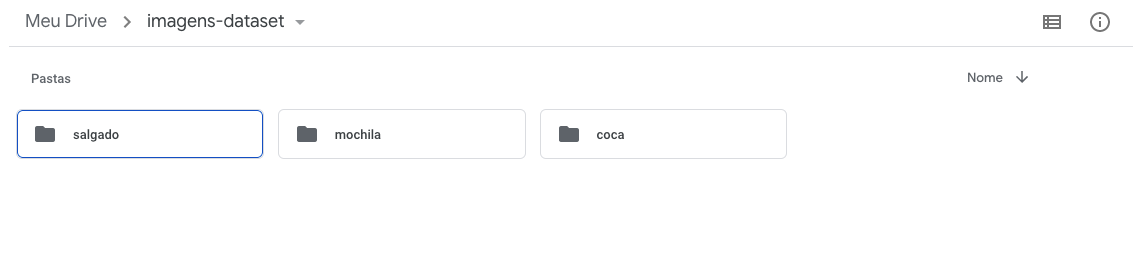

**Tudo em minusculo!!**



Verificar extensão da imagem antes de colocar no Drive, tive problema com o formato dela, onde no meu celular tinha extensão jpeg mas ao enviar era JPG.


In [19]:
!cp -R /content/drive/MyDrive/imagens-dataset/* /content/Scripts-Dataset/models/images

Criar uma pasta com o nome `back` com as imagens de fundo, na mesma pasta `imagens-dataset`

In [20]:
!cp /content/drive/MyDrive/imagens-dataset/back/* /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds/

Apagar pasta `back`

In [21]:
!rm -R /content/Scripts-Dataset/models/images/back

# **Pré-Processamento de imagens**

In [22]:
root_folder = '/content/Scripts-Dataset/models/images'

In [ ]:
# nao executar essa linha de codigo (Em teste)
%cd /content/Scripts-Dataset/models/salience_model
!wget https://github.com/Nicolasalan/Scripts-Dataset/models/salience_model/model.ckpt-200.data-00000-of-00001/main.zip

## Formato das imagens (JPG, pbm, jpg)

As imagens na pasta `images` devem estar em formado JPG, o comando a baixo já converte para JPG, caso a sua imagem esteja em outro formado além de png ou jpg é só trocar no lugar que esta escrito `Aqui!!` para o seu formado.
```
# Converter imagens jpg
%cd /content/Scripts-Dataset/images/'Nome da pasta do objeto'
!mogrify -format JPG *.(Aqui!!)
!rm *.(Aqui!!)
```

In [24]:
# Converter imagens jpg
%cd /content/Scripts-Dataset/models/images/garrafa
!mogrify -format JPG *.jpeg # converte a imagem de jpg para JPG
!rm *.jpeg # deleta as imagens com extensao jpg

/content/Scripts-Dataset/models/images/garrafa


Caso tenha outra extensão, é só acrescentar no final do comando

## Rezise (640x480)

In [26]:
# Converter imagens jpg
%cd /content/Scripts-Dataset/models/images/garrafa
!mogrify -resize 640x480 *.JPG

/content/Scripts-Dataset/models/images/garrafa


## Renomeando Imagens

In [28]:
%cd /content/Scripts-Dataset/models/images/garrafa
!x=1; for i in *; do mv -v "$i" "$x-image.JPG"; x=$((x+1)); done # renomeia as images no diretorio especificado

/content/Scripts-Dataset/models/images/garrafa
renamed 'photo1661192482 (1).JPG' -> '1-image.JPG'
renamed 'photo1661192482 (2).JPG' -> '2-image.JPG'
renamed 'photo1661192482.JPG' -> '3-image.JPG'
renamed 'photo1661192483 (1).JPG' -> '4-image.JPG'
renamed 'photo1661192483.JPG' -> '5-image.JPG'


## Comandos úteis para gerenciamento de arquivo

In [ ]:
# Deletar todos os arquivos de uma pasta com extensao JPG
%cd /content/Scripts-Dataset/models/images/'Nome do objeto'
!rm *.JPG

# **Remoção de Fundo com Salience Model**

## Criação das máscaras

Requisitos:

*   Todas as imagens com extensão JPG.
*   Tamanho 640x480.
*   imagens no caminho /content/Scripts-Dataset/models/images/...
*   Modelos no arquivo/content/Scripts-Dataset/models/salience_model/modelos utilizados `checkpoint`, `model.ckpt-200.data-00000-of-00001`, `model.ckpt-200.index`.









In [29]:
%cd /content/Scripts-Dataset/models/
!python2.7 rmbg.py

/content/Scripts-Dataset/models



2022-08-22 23:12:19.338076: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-08-22 23:12:19.341883: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2022-08-22 23:12:19.643737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1005] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-22 23:12:19.644544: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55eba0da2d80 executing computations on platform CUDA. Devices:
2022-08-22 23:12:19.644579: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2022-08-22 23:12:19.647371: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2299995000 Hz
2022-08

**As máscaras geradas devem ser baixadas e ajustadas para que o contorno ser igual ao objeto.**

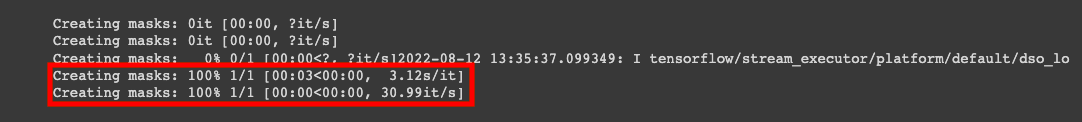

In [32]:
nome_objeto = 'garrafa' # colocar com o nome da imagem

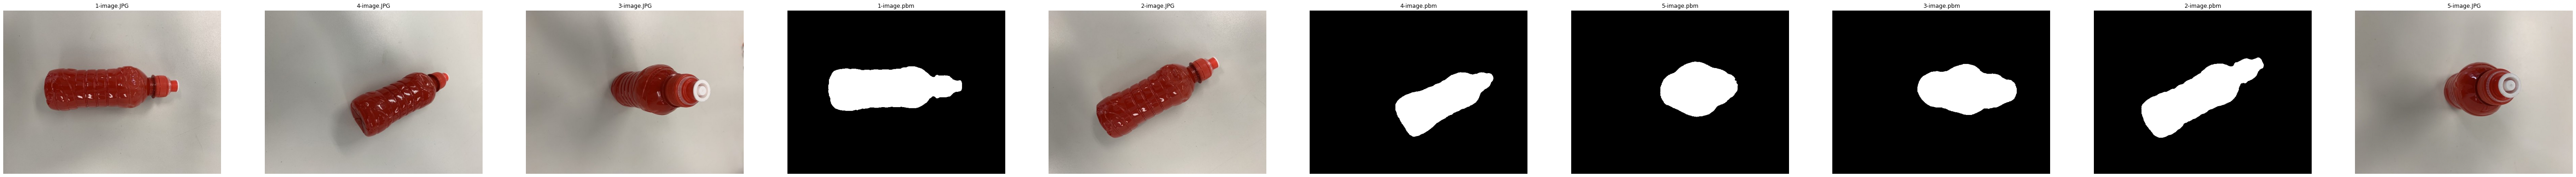

In [33]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

pasta = '/content/Scripts-Dataset/models/images/' + nome_objeto

caminho_names = []
name_image = []
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        img_names = os.path.join(diretorio, arquivo)
        caminho_names.append(img_names)
        name_image.append(arquivo)

figure = plt.figure(figsize=(100, 100)) # caso queira diminuir o tamanho da imagem

for i in range(len(caminho_names)):
    img = cv2.imread(caminho_names[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, len(caminho_names), i+1)
    plt.imshow(img)
    plt.title(name_image[i])
    plt.axis('off')

plt.show()

**Exemplo de Saida ...**

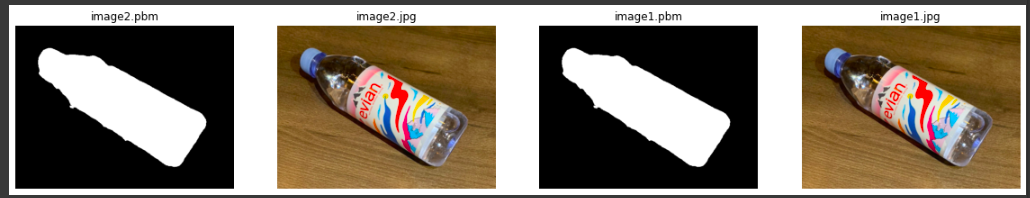

# **Gerar DataSet**

Mover o diretório `images` para `objects_dir` que esta no caminho `/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir`

In [34]:
!cp -R /content/Scripts-Dataset/models/images/* /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir

## Gerar DataSet com anotações e arquivos yaml

In [35]:
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir
%rm selected.txt

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir


Adicionar os nomes dos objetos na linha de código abaixo:

In [36]:
%%writefile selected.txt
coca 
garrafa 

Writing selected.txt


Segue um exemplo ...

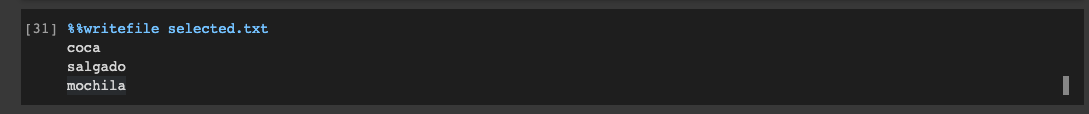

**TIRAR IMAGENS DE FUNDO DE ONDE SERÃO DETECTADOS OS OBJETOS, ESSAS AS IMAGENS TEM QUE ESTAR EM `jpg` NO CAMINHO** `/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds`
Além disso:

*   Redimensionar na imagem 640x480
*   Não precisa criar pastas para cada fundo, somente adicionar todos no backgrounds




**Converter imagens de JPG para jpg**

In [37]:
# Converter imagens jpg caso esteja em JPG (backgrounds)
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds/
!mogrify -format jpg *.jpeg # converte a imagem de jpg para JPG
!rm *.jpeg # deleta as imagens com extensao jpg

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/backgrounds


In [39]:
# Converter imagens para jpg
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir/garrafa
!mogrify -format jpg *.JPG # converte a imagem de jpg para JPG
!rm *.JPG # deleta as imagens com extensao jpg

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir/garrafa


### Configurações da geração das imagens

Nessa etapa de geração do DataSet é a mais importante, primeiro precisamos gerar um número pequeno e ver como o script gera o dataset, como tamanho do objeto, numero de vezes que aparece na imagem, angulo e outros parâmetros. Caso a geração esteja ruim, voltar no processamento de imagem para verificar se todas as imagens estão no mesma proporção ou verificar nomes duplicados, além disso, outros erros que acontecem.


*   Tamanho das imagens 
*   Imagens com nomes duplicados
*   Verificar Instalação
*   Verificar se confere o nome da imagem ser o mesmo da máscara
*   Verificar extensão

Estou listando esses problemas porque já tive problemas com todos eles.









In [40]:
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/
%rm defaults.py

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation


Modificar somente as linhas com `<<<<<<<<<<<<<<`

In [41]:
%%writefile defaults.py
# coding=utf-8

BACKGROUND_DIR = 'demo_data_dir/backgrounds/'
BACKGROUND_GLOB_STRING = '*.jpg'
POISSON_BLENDING_DIR = '/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/pb'
SELECTED_LIST_FILE = 'demo_data_dir/selected.txt'
DISTRACTOR_LIST_FILE = 'demo_data_dir/neg_list.txt'
DISTRACTOR_DIR = 'demo_data_dir/distractor_objects_dir/'
DISTRACTOR_GLOB_STRING = '*.jpg'
INVERTED_MASK = False # Defina como verdadeiro se os pixels brancos representarem o plano de fundo

# Parameters for generator
NUMBER_OF_WORKERS = 4
BLENDING_LIST = ['none']

# Parameters for images
MIN_NO_OF_OBJECTS = 1 # <<<<<<<<<<<<<<
MAX_NO_OF_OBJECTS = 2 # <<<<<<<<<<<<<<
MIN_NO_OF_DISTRACTOR_OBJECTS = 0
MAX_NO_OF_DISTRACTOR_OBJECTS = 0
WIDTH = 640
HEIGHT = 480
MAX_ATTEMPTS_TO_SYNTHESIZE = 20

# Parameters for objects in images
MIN_SCALE = 0.3 # min scale for scale augmentation ---mudar esses parametros caso a imagem nao fique satisfatoria # <<<<<<<<<<<<<<
MAX_SCALE = 0.4 # max scale for scale augmentation ----mudar esses parametros caso a imagem nao fique satisfatoria # <<<<<<<<<<<<<<
MAX_DEGREES = 0 # rotação máxima permitida durante o aumento de rotação # <<<<<<<<<<<<<<
MAX_TRUNCATION_FRACTION = 0.25 # fração máxima a ser truncada = MAX_TRUNCACTION_FRACTION*(WIDTH/HEIGHT)
MAX_ALLOWED_IOU = 0.1 # IOU > MAX_ALLOWED_IOU é considerado uma oclusão
MIN_WIDTH = 2 # Largura mínima do objeto a ser usado para geração de dados # <<<<<<<<<<<<<<
MIN_HEIGHT = 6 # Altura mínima do objeto a ser usado para geração de dados # <<<<<<<<<<<<<<

Writing defaults.py


In [42]:
%cat defaults.py

# coding=utf-8

BACKGROUND_DIR = 'demo_data_dir/backgrounds/'
BACKGROUND_GLOB_STRING = '*.jpg'
POISSON_BLENDING_DIR = '/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/pb'
SELECTED_LIST_FILE = 'demo_data_dir/selected.txt'
DISTRACTOR_LIST_FILE = 'demo_data_dir/neg_list.txt'
DISTRACTOR_DIR = 'demo_data_dir/distractor_objects_dir/'
DISTRACTOR_GLOB_STRING = '*.jpg'
INVERTED_MASK = False # Defina como verdadeiro se os pixels brancos representarem o plano de fundo

# Parameters for generator
NUMBER_OF_WORKERS = 4
BLENDING_LIST = ['none']

# Parameters for images
MIN_NO_OF_OBJECTS = 1 # <<<<<<<<<<<<<<
MAX_NO_OF_OBJECTS = 2 # <<<<<<<<<<<<<<
MIN_NO_OF_DISTRACTOR_OBJECTS = 0
MAX_NO_OF_DISTRACTOR_OBJECTS = 0
WIDTH = 640
HEIGHT = 480
MAX_ATTEMPTS_TO_SYNTHESIZE = 20

# Parameters for objects in images
MIN_SCALE = 0.3 # min scale for scale augmentation ---mudar esses parametros caso a imagem nao fique satisfatoria # <<<<<<<<<<<<<<
MAX_SCALE = 0.4 # max scale for scale augmentation ----m



---



Esse comando gera os dados sintéticos, é muito importante verificar como os dados estão sendo gerados para ser compatível com a realidade.

No comando abaixo o parâmetro `--num` é a quantidade de dados geradas, para verificar suas imagem como 1, se a geração ficar boa então pode aumentar o número de imagens.

In [47]:
%cd /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/
!python2.7 dataset_generator.py --num 450 --dontocclude /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/objects_dir/ /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/

/content/Scripts-Dataset/Scripts/synthetic/syndata-generation
Number of background images : 2
List of distractor files collected: []
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/1_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/189_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/377_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/565_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/190_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/2_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/566_none.jpg
Working on /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images/378_none.jpg
Working on /content/Scripts-Dataset/Scr

Saida do dataset sendo gerado:

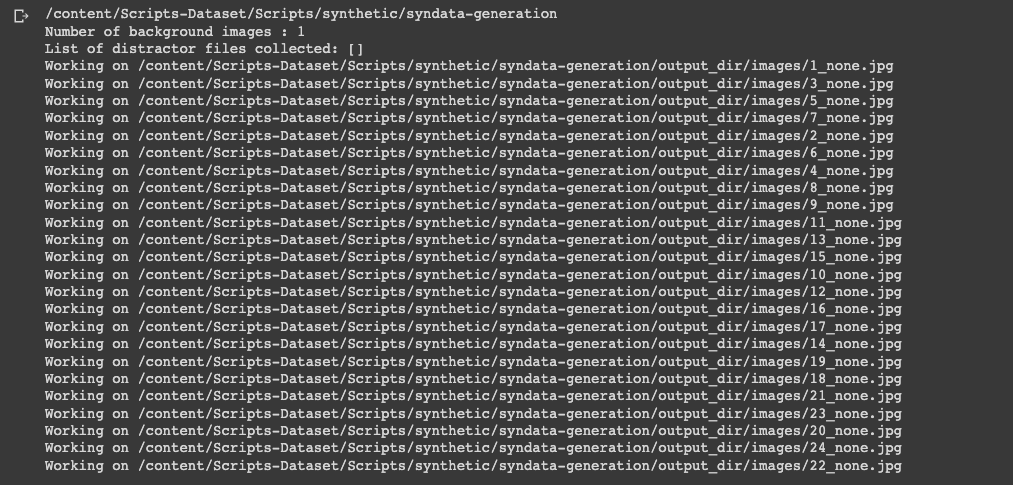

In [48]:
# contar numeros de dados gerados
import os
initial_count = 0
dir = "/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images"
for path in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, path)):
        initial_count += 1
print("Numero de imagens geradas: ", initial_count)

Numero de imagens geradas:  3001


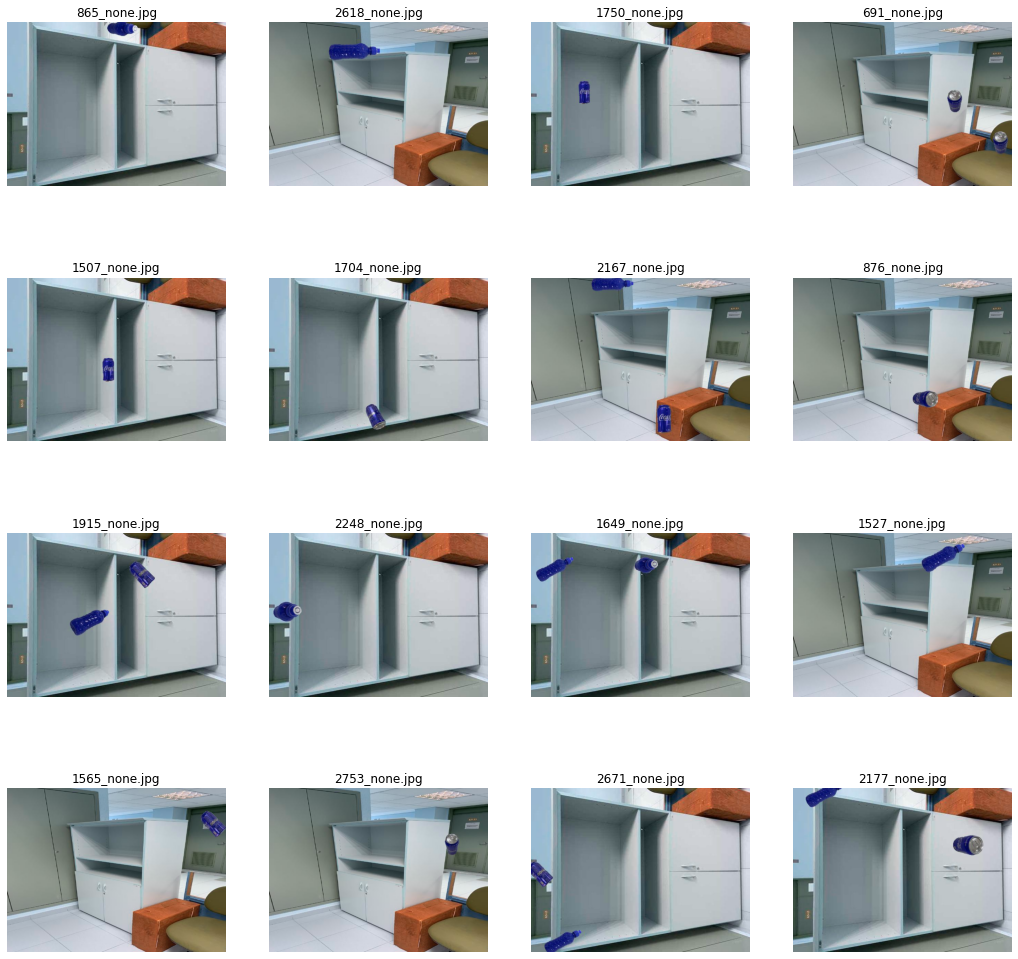

In [49]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

pasta = '/content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/images'
caminho_names = []
name_image = []
for diretorio, subpastas, arquivos in os.walk(pasta):
    for arquivo in arquivos:
        img_names = os.path.join(diretorio, arquivo)
        caminho_names.append(img_names)
        name_image.append(arquivo)

L = 4
W = 4

fig, axes = plt.subplots(L, W, figsize = (18, 18))
axes = axes.ravel()

for i in np.arange(0, L*W):
    img = cv2.imread(caminho_names[i])
    axes[i].imshow(img)
    axes[i].set_title(name_image[i])
    axes[i].axis('off')

plt.show()

In [46]:
# Comando para excluir o output das imagens geradas (caso nao tenha ficado boa)
!rm -r /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/*

Plotar imagens

Na pasta `output_dir` poderemos encontrar duas outras pastas, a pasta com as imagens geradas `images`, e a pasta `annotations` onde estão as anotações das imagens.

## Criação do arquivo csv

In [50]:
%cd /content/Scripts-Dataset/Scripts/synthetic
!python generate_csv.py xml ./syndata-generation/output_dir/annotations synthetic.csv ./syndata-generation/output_dir/images

/content/Scripts-Dataset/Scripts/synthetic
creating_images_dict: 100% 3001/3001 [00:00<00:00, 14563.57it/s]


In [51]:
!mv /content/Scripts-Dataset/Scripts/synthetic/synthetic.csv /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir

In [52]:
# Mover todo o conteúdo do output dir para DataSet
!cp -r /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/output_dir/* /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet

## Gerar train_eval

In [53]:
%cd /content/Scripts-Dataset/Scripts/detection_util_scripts
!python generate_train_eval_modified.py '/content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet/synthetic.csv' -f 0.8 -o .

/content/Scripts-Dataset/Scripts/detection_util_scripts
generate_train_eval_modified.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  validation_df = validation_df.merge(exception, on='filename', how='left', indicator=True, suffixes=('', '_toremove')).query('_merge == "left_only"').drop('_merge', 1)


## Gerar arquivo Label_Map

In [54]:
!cp /content/Scripts-Dataset/Scripts/synthetic/syndata-generation/demo_data_dir/selected.txt /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet

In [55]:
%cd /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet
!mv selected.txt Label_Map.txt

/content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet


In [56]:
%cd /content/Scripts-Dataset/Scripts/detection_util_scripts
!python generate_pbtxt.py txt ./DataSet/Label_Map.txt ./DataSet/Label_Map.pbtxt

/content/Scripts-Dataset/Scripts/detection_util_scripts


## Gerar Arquivo tfrecord (eval, train)

In [57]:
%cd /content/Scripts-Dataset/Scripts/detection_util_scripts
!python generate_tfrecord.py ./DataSet/synthetic_train.csv ./DataSet/Label_Map.pbtxt ./DataSet/images ./DataSet/train.record
!python generate_tfrecord.py ./DataSet/synthetic_eval.csv ./DataSet/Label_Map.pbtxt ./DataSet/images ./DataSet/eval.record

/content/Scripts-Dataset/Scripts/detection_util_scripts
['item {', 'id: 1', 'display_name: "coca"', '}', '', 'item {', 'id: 2', 'display_name: "garrafa"', '}', '']
groups: 100% 2400/2400 [00:01<00:00, 1512.45it/s]
Successfully created the TFRecords: /content/Scripts-Dataset/Scripts/detection_util_scripts/./DataSet/train.record
['item {', 'id: 1', 'display_name: "coca"', '}', '', 'item {', 'id: 2', 'display_name: "garrafa"', '}', '']
groups: 100% 601/601 [00:00<00:00, 1601.29it/s]
Successfully created the TFRecords: /content/Scripts-Dataset/Scripts/detection_util_scripts/./DataSet/eval.record


**Baixar o arquivo Record para o seu drive na pasta weight**

In [58]:
# Criar pasta weight no seu drive
!mkdir /content/drive/MyDrive/weight

In [59]:
# comando para baixar o arquivo para a pasta weight
!cp /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet/*.record /content/drive/MyDrive/weight/
!cp /content/Scripts-Dataset/Scripts/detection_util_scripts/DataSet/Label_Map.pbtxt /content/drive/MyDrive/weight/